### InceptionV3

In [4]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Lambda
from tensorflow.keras.layers import add
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.applications.imagenet_utils import preprocess_input 
import numpy as np
import os

    
IMG_SIZE = (300, 300, 3)
inceptionv3 = InceptionV3(include_top=False, weights='imagenet', input_shape=IMG_SIZE) 

- 데이터 구축(데이터 확인할때 편하게 쓰려면 바꿔서 쓰렴)

In [2]:
# categories = ['금전수','스투키','스트라이트벤자민','싱고니움','아레카야자','인도고무나무','천냥금','쿠페아','파키라','홍페페'] # 카테고리 늘리기

In [5]:
base_dir = "./Data4"

train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "val")

train_p1_dir = os.path.join(train_dir, "금전수")
train_p2_dir = os.path.join(train_dir, "산세베리아")
train_p3_dir = os.path.join(train_dir, "스트라이프 벤자민")
train_p4_dir = os.path.join(train_dir, "스파트필름")
train_p5_dir = os.path.join(train_dir, "싱고니움")
train_p6_dir = os.path.join(train_dir, "아레카야자")
train_p7_dir = os.path.join(train_dir, "인도고무나무")
train_p8_dir = os.path.join(train_dir, "천냥금")
train_p9_dir = os.path.join(train_dir, "쿠페아")
train_p10_dir = os.path.join(train_dir, "타라")
train_p11_dir = os.path.join(train_dir, "파키라")
train_p12_dir = os.path.join(train_dir, "호야")
train_p12_dir = os.path.join(train_dir, "호야")



test_p1_dir = os.path.join(test_dir, "금전수t")
test_p2_dir = os.path.join(test_dir, "산세베리아t")
test_p3_dir = os.path.join(test_dir, "스트라이프 벤자민t")
test_p4_dir = os.path.join(test_dir, "스파트필름t")
test_p5_dir = os.path.join(test_dir, "싱고니움t")
test_p6_dir = os.path.join(test_dir, "아레카야자t")
test_p7_dir = os.path.join(test_dir, "인도고무나무t")
test_p8_dir = os.path.join(test_dir, "천냥금t")
test_p9_dir = os.path.join(test_dir, "쿠페아t")
test_p10_dir = os.path.join(test_dir, "타라t")
test_p11_dir = os.path.join(test_dir, "파키라t")
test_p12_dir = os.path.join(test_dir, "호야t")
test_p12_dir = os.path.join(test_dir, "호야t")

In [21]:
print("훈련용 금전수 데이터 개수 : ", len(os.listdir(train_p1_dir)))
print("훈련용 산세베리아 데이터 개수 : ", len(os.listdir(train_p2_dir)))
print("훈련용 스트라이프 벤자민 데이터 개수 : ", len(os.listdir(train_p3_dir)))
print("훈련용 스파트필름 데이터 개수 : ", len(os.listdir(train_p4_dir)))
print("훈련용 싱고니움 데이터 개수 : ", len(os.listdir(train_p5_dir)))
print("훈련용 아레카야자 데이터 개수 : ", len(os.listdir(train_p6_dir)))
print("훈련용 인도고무나무 데이터 개수 : ", len(os.listdir(train_p7_dir)))
print("훈련용 천냥금 데이터 개수 : ", len(os.listdir(train_p8_dir)))
print("훈련용 쿠페아 데이터 개수 : ", len(os.listdir(train_p9_dir)))
print("훈련용 타라 데이터 개수 : ", len(os.listdir(train_p10_dir)))
print("훈련용 파키라 데이터 개수 : ", len(os.listdir(train_p11_dir)))
print("훈련용 호야 데이터 개수 : ", len(os.listdir(train_p12_dir)))


print("검증용 금전수 데이터 개수 : ", len(os.listdir(test_p1_dir)))
print("검증용 산세베리아 데이터 개수 : ", len(os.listdir(test_p2_dir)))
print("검증용 스트라이프 벤자민 데이터 개수 : ", len(os.listdir(test_p3_dir)))
print("검증용 스파트필름 데이터 개수 : ", len(os.listdir(test_p4_dir)))
print("검증용 싱고니움 데이터 개수 : ", len(os.listdir(test_p5_dir)))
print("검증용 아레카야자 데이터 개수 : ", len(os.listdir(test_p6_dir)))
print("검증용 인도고무나무 데이터 개수 : ", len(os.listdir(test_p7_dir)))
print("검증용 천냥금 데이터 개수 : ", len(os.listdir(test_p8_dir)))
print("검증용 쿠페아 데이터 개수 : ", len(os.listdir(test_p9_dir)))
print("검증용 타라 데이터 개수 : ", len(os.listdir(test_p10_dir)))
print("검증용 파키라 데이터 개수 : ", len(os.listdir(test_p11_dir)))
print("검증용 호야 데이터 개수 : ", len(os.listdir(test_p12_dir)))

훈련용 금전수 데이터 개수 :  600
훈련용 산세베리아 데이터 개수 :  600
훈련용 스트라이프 벤자민 데이터 개수 :  600
훈련용 스파트필름 데이터 개수 :  600
훈련용 싱고니움 데이터 개수 :  600
훈련용 아레카야자 데이터 개수 :  600
훈련용 인도고무나무 데이터 개수 :  600
훈련용 천냥금 데이터 개수 :  600
훈련용 쿠페아 데이터 개수 :  600
훈련용 타라 데이터 개수 :  600
훈련용 파키라 데이터 개수 :  600
훈련용 호야 데이터 개수 :  600
검증용 금전수 데이터 개수 :  100
검증용 산세베리아 데이터 개수 :  100
검증용 스트라이프 벤자민 데이터 개수 :  100
검증용 스파트필름 데이터 개수 :  100
검증용 싱고니움 데이터 개수 :  100
검증용 아레카야자 데이터 개수 :  100
검증용 인도고무나무 데이터 개수 :  100
검증용 천냥금 데이터 개수 :  100
검증용 쿠페아 데이터 개수 :  100
검증용 타라 데이터 개수 :  100
검증용 파키라 데이터 개수 :  100
검증용 호야 데이터 개수 :  100


- 모델동결 및 미세조정

In [22]:
for i, layer in enumerate(inceptionv3.layers):
    print(i,layer.name)

0 input_2
1 conv2d_94
2 batch_normalization_94
3 activation_94
4 conv2d_95
5 batch_normalization_95
6 activation_95
7 conv2d_96
8 batch_normalization_96
9 activation_96
10 max_pooling2d_4
11 conv2d_97
12 batch_normalization_97
13 activation_97
14 conv2d_98
15 batch_normalization_98
16 activation_98
17 max_pooling2d_5
18 conv2d_102
19 batch_normalization_102
20 activation_102
21 conv2d_100
22 conv2d_103
23 batch_normalization_100
24 batch_normalization_103
25 activation_100
26 activation_103
27 average_pooling2d_9
28 conv2d_99
29 conv2d_101
30 conv2d_104
31 conv2d_105
32 batch_normalization_99
33 batch_normalization_101
34 batch_normalization_104
35 batch_normalization_105
36 activation_99
37 activation_101
38 activation_104
39 activation_105
40 mixed0
41 conv2d_109
42 batch_normalization_109
43 activation_109
44 conv2d_107
45 conv2d_110
46 batch_normalization_107
47 batch_normalization_110
48 activation_107
49 activation_110
50 average_pooling2d_10
51 conv2d_106
52 conv2d_108
53 conv2d

In [23]:
for layer in inceptionv3.layers[:289]:
        layer.trainable = False

In [24]:
y = inceptionv3.output
y = GlobalAveragePooling2D()(y)
y = BatchNormalization()(y)
y = Dropout(0.5)(y)
y = Dense(1024, activation="relu")(y)
y = BatchNormalization()(y)
y = Dropout(0.5)(y)
y = Dense(512, activation="relu")(y)
predictions2 = Dense(12, activation="softmax")(y) # 식물 종수에 따라서 숫자 바꾸기
model1 = Model(inputs=inceptionv3.input, outputs=predictions2)

model1.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 300, 300, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 149, 149, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 149, 149, 32) 96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 149, 149, 32) 0           batch_normalization_94[0][0]     
______________________________________________________________________________________________

In [90]:
y = inceptionv3.output
y = GlobalAveragePooling2D()(y)
y = BatchNormalization()(y)
y = Dropout(0.5)(y)
y = Dense(1024, activation="relu")(y)
y = BatchNormalization()(y)
y = Dropout(0.5)(y)
y = Dense(512, activation="relu")(y)
predictions2 = Dense(12, activation="softmax")(y) # 식물 종수에 따라서 숫자 바꾸기
model2 = Model(inputs=inceptionv3.input, outputs=predictions2)

model2.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 300, 300, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 149, 149, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 149, 149, 32) 96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 149, 149, 32) 0           batch_normalization_94[0][0]     
____________________________________________________________________________________________

In [91]:
classes = 12
epochs = 100
#epochs = 500
targetx = 300
targety = 300

In [92]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 위노그라드 알고리즘 설정
os.environ['TF_ENABLE_WINOGRAD_NONFUSED'] = '1'

rootPath = './Data4'

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=30,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)


trainGen = train_datagen.flow_from_directory(
    os.path.join(rootPath, 'train'),
    target_size=(targetx, targety),
    subset='training',
    shuffle=True,
    class_mode='categorical'    
)

validationGen = val_datagen.flow_from_directory(
    os.path.join(rootPath, 'val'),
    target_size=(targetx, targety),
    shuffle=True,
    class_mode='categorical'
)

Found 7200 images belonging to 12 classes.
Found 1200 images belonging to 12 classes.


- 컴파일, 학습 진행

In [27]:
model1.compile(optimizer='adam', 
               loss='categorical_crossentropy', 
               metrics=['acc'])

In [93]:
model2.compile(optimizer='adam', 
               loss='categorical_crossentropy', 
               metrics=['acc'])

In [94]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

SAVE_DIR = "./Model/"
#해당 폴더가 없다면 생성
if not os.path.exists(SAVE_DIR) :
    os.mkdir(SAVE_DIR)
    
modelpath = SAVE_DIR + "pima_{epoch:03d}_{acc:.3f}_{val_acc:.3f}.hdf5"


#ModelCheckpoint 파라미터 설정
# filepath : 저장할 파일 경로
# moniter : 베스트 모델의 평가 기준(val_acc)
# save_best_only : monitor 값이 나아진 경우에만 저장
mc = ModelCheckpoint(filepath = modelpath,
                     monitor = "val_acc",
                     save_best_only = True)

# monitor : 중단하는 기준값
# patience : 학습이 나아지지 않더라도 몇개는 더 두고보는 것
es = EarlyStopping(monitor="val_acc", patience=10)

In [29]:
#04/06/00:30 학습 시작

epochs = 100

history = model1.fit_generator(
    trainGen, 
    epochs=epochs,
    validation_data=validationGen,
    verbose=1,
    callbacks = [mc,es]        
)

C:\Users\SMHRD\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
225/225 [==============================] - 398s 2s/step - loss: 1.6630 - acc: 0.5354 - val_loss: 0.6413 - val_acc: 0.8125
Epoch 2/100
225/225 [==============================] - 374s 2s/step - loss: 0.7560 - acc: 0.7821 - val_loss: 0.6366 - val_acc: 0.8383
Epoch 3/100
225/225 [==============================] - 375s 2s/step - loss: 0.6058 - acc: 0.8256 - val_loss: 0.6494 - val_acc: 0.8433
Epoch 4/100
225/225 [==============================] - 376s 2s/step - loss: 0.4586 - acc: 0.8628 - val_loss: 0.5800 - val_acc: 0.8567
Epoch 5/100
225/225 [==============================] - 375s 2s/step - loss: 0.3545 - acc: 0.8892 - val_loss: 0.5433 - val_acc: 0.8733
Epoch 6/100
225/225 [==============================] - 375s 2s/step - loss: 0.3470 - acc: 0.8942 - val_loss: 0.6395 - val_acc: 0.8558
Epoch 7/100
225/225 [==============================] - 374s 2s/step - loss: 0.3171 - acc: 0.8980 - val_loss: 0.5593 - val_acc: 0.8750
Epoch 8/100
225/225 [==============================] - 375s 2s

In [95]:
#04/06/00:30 학습 시작

epochs = 100

history = model2.fit_generator(
    trainGen, 
    epochs=epochs,
    validation_data=validationGen,
    verbose=1,
    callbacks = [mc,es]        
)

C:\Users\SMHRD\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
 18/225 [=>............................] - ETA: 4:50 - loss: 2.2394 - acc: 0.3415

KeyboardInterrupt: 

New image prediction :  아레카야자
accuracy : 0.017022287473082542


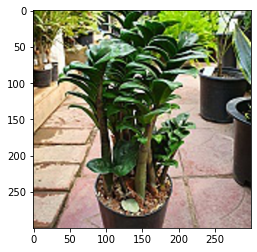

New image prediction :  금전수
accuracy : 0.9996110796928406


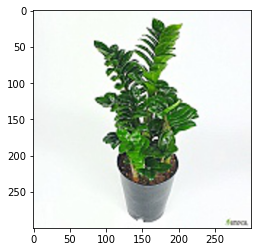

New image prediction :  산세베리아
accuracy : 3.184752586093964e-07


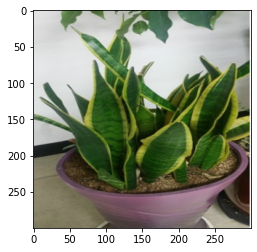

New image prediction :  산세베리아
accuracy : 6.440790885318417e-16


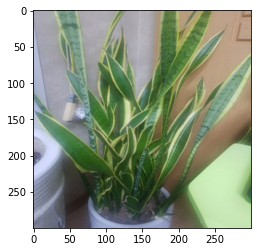

New image prediction :  스트라이트벤자민
accuracy : 3.65748782371611e-08


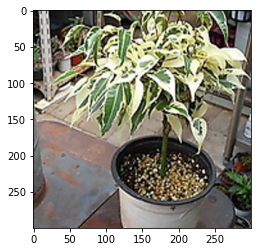

New image prediction :  스트라이트벤자민
accuracy : 2.2389570609574943e-17


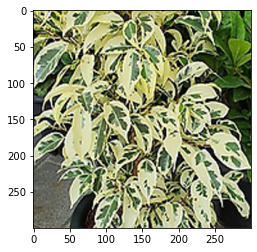

New image prediction :  스파트필름
accuracy : 6.314731308521004e-06


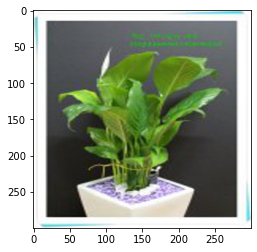

New image prediction :  스파트필름
accuracy : 0.03772952780127525


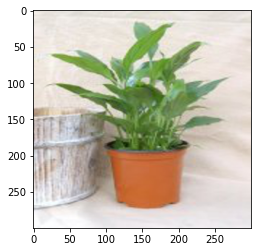

New image prediction :  싱고니움
accuracy : 0.0018303742399439216


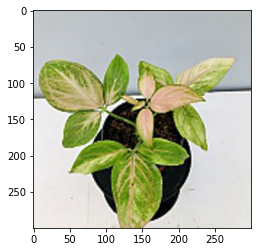

New image prediction :  싱고니움
accuracy : 4.8721805796958506e-05


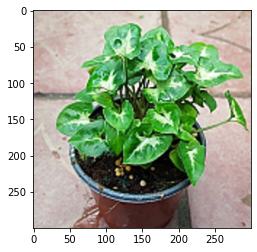

New image prediction :  아레카야자
accuracy : 3.109077394407994e-13


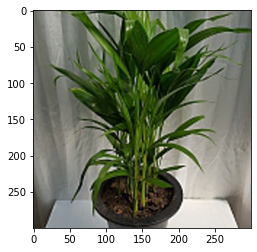

New image prediction :  아레카야자
accuracy : 2.997184367359296e-08


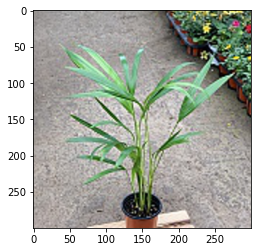

New image prediction :  천냥금
accuracy : 0.0028809495270252228


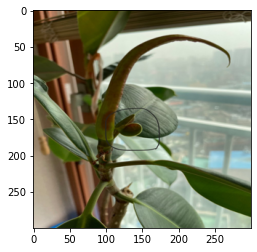

New image prediction :  인도고무나무
accuracy : 0.0001937368360813707


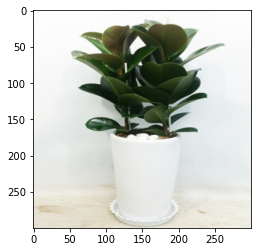

New image prediction :  천냥금
accuracy : 0.001909606042318046


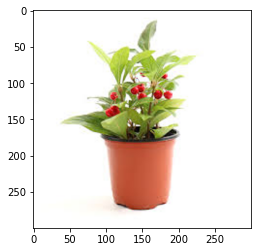

New image prediction :  천냥금
accuracy : 5.509964568482274e-15


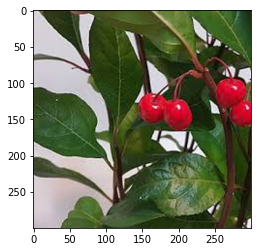

New image prediction :  쿠페아
accuracy : 1.37959615853346e-26


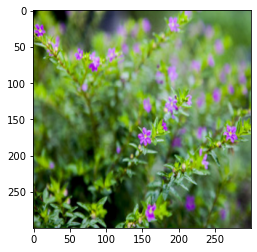

New image prediction :  쿠페아
accuracy : 1.442452766628494e-29


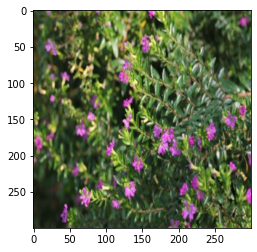

New image prediction :  타라
accuracy : 5.066842501122437e-09


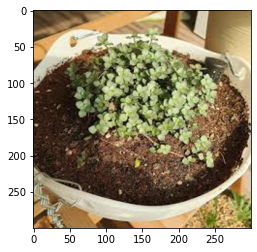

New image prediction :  타라
accuracy : 3.64401012120652e-06


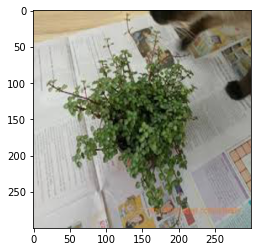

New image prediction :  파키라
accuracy : 2.5370574803673662e-05


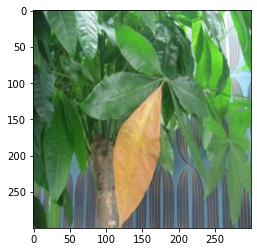

New image prediction :  파키라
accuracy : 1.6206344298552722e-05


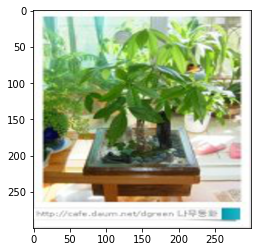

New image prediction :  호야
accuracy : 3.0758896173210815e-05


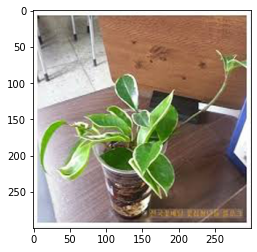

New image prediction :  호야
accuracy : 1.3999899017846928e-09


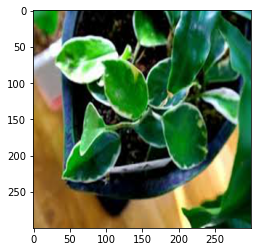

In [31]:
from tensorflow.keras.preprocessing import image
from PIL import Image
import matplotlib.pyplot as plt

test_dir = "./Data4/test/"

image_path = []
for i in os.listdir(test_dir):
    test_image_name = test_dir + i
    image_path.append(test_image_name)  

for image in image_path:
    img = Image.open(image)
    img = img.convert("RGB")
    img = img.resize((targetx,targety))    
    data = np.asarray(img)
    X = np.array(data)
    X = X.astype("float") / 256
    X = X.reshape(-1, targetx, targety,3)
    categories = ['금전수','산세베리아','스트라이트벤자민','스파트필름','싱고니움','아레카야자','인도고무나무','천냥금','쿠페아','타라','파키라','호야'] # 카테고리 늘리기
    pred = model1.predict(X)  
    result = [np.argmax(value) for value in pred]   # 예측 값중 가장 높은 클래스 반환
    print('New image prediction : ',categories[result[0]])
    print("accuracy : {}".format(max(pred[0][0],pred[0][0])))
    plt.imshow(img)
    plt.show()

In [88]:
import matplotlib.pyplot as plt

def show_graph(history_dict):
    accuracy = history_dict['acc']
    val_accuracy = history_dict['val_acc']
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)
    
    plt.figure(figsize=(16, 1))
    
    plt.subplot(121)
    plt.subplots_adjust(top=2)
    plt.plot(epochs, accuracy, 'black', label='Training accuracy', linewidth=2) # marker='o', markersize=2,\ markeredgecolor='white', markeredgewidth=1
    plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy', linewidth=2)
    plt.title('Trainging and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')

    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
              fancybox=True, shadow=True, ncol=5)

    plt.subplot(122)
    plt.plot(epochs, loss, 'black', label='Training loss', linewidth=2)
    plt.plot(epochs, val_loss, 'b', label='Validation loss',linewidth=2)
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=5)

    plt.show()
    
def smooth_curve(points, factor=.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

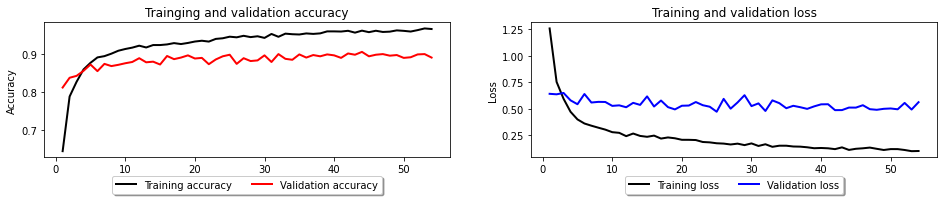

In [89]:
show_graph(history.history)